#### A7 – FEATURE EXTRACTION FROM LABELED BLOBS

Andeo, Lovely\
2020-05405\
FX-2

**Activity 7**

Layout a single-colored cartolina or cloth on a table and spread out several objects with different shapes or sizes. In preparation for machine learning, choose objects that you would like to classify. For example, different coins, mixed nuts or grains, medicinal pills, electrical components, etc. Capture images of your spread out samples.

Segment your objects from the background. Clean the resulting image with morphological operations, as necessary.

Label and measure blob features using bwlabel and regionprops.


In [1]:
from PIL import Image
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
import cv2

from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import (erosion, dilation, closing, opening)
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from matplotlib.image import imread
import matplotlib.pyplot as plt
from tqdm import tqdm


In [52]:
def features(img_name, lower_threshold, upper_threshold, element, operation1, operation2):
    I = Image.open(img_name)
    I_gray = I.convert('L')

    # Calculating the histogram
    count, cells = I_gray.histogram(), list(range(256)) 
    plt.plot(cells, count)
    plt.title('Histogram of the image')
    plt.xlabel('grayscale')
    plt.ylabel('pixels')    

    # Specifying the range values for the threshold
    threshold_range = (lower_threshold, upper_threshold)

    # Thresholding the image within the range
    BW = np.logical_and(np.array(I_gray) > threshold_range[0], np.array(I_gray) < threshold_range[1])

    seg = operation2(operation1(BW, element), element)
    fig, axs = plt.subplots(1, 2, figsize=(18, 12))
    axs[0].imshow(I)
    axs[0].set_title('Original image')
    axs[1].imshow(seg, cmap='tab10')
    axs[1].set_title('Segmented image')
    
    # Getting the properties or features
    df = pd.DataFrame(regionprops_table(np.array(I_gray), properties = properties))
    return df

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
0,23,9,46,227,467,56772,91778,446.266012,234.695265,0.850541
1,35,3,30,311,508,125256,147224,512.151062,340.297051,0.747336
2,41,8,13,298,457,108489,128760,514.844753,347.713172,0.737475
3,58,5,1,312,487,115066,149202,565.203057,335.427491,0.804861
4,52,2,6,313,502,119354,154256,523.967111,343.353148,0.755373
...,...,...,...,...,...,...,...,...,...,...
249,38,20,31,298,503,102806,131216,522.218779,317.442308,0.794035
250,23,20,32,287,493,87966,123087,454.227828,306.118104,0.738795
251,29,7,32,276,486,87319,122126,421.859511,310.035929,0.678146
252,17,7,44,263,393,56814,89344,449.531514,233.196011,0.854924


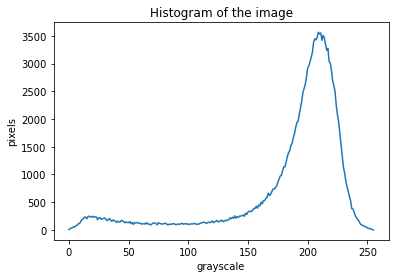

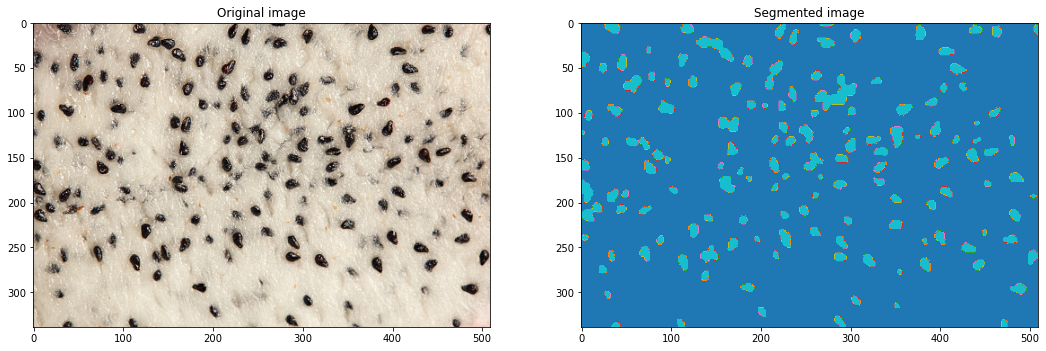

In [53]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','bbox','convex_area','bbox_area','major_axis_length', 'minor_axis_length','eccentricity']
features('seeds.jpg', 0, 110, element, closing, opening)

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
0,1,223,326,224,327,1,1,0.000000,0.000000,0.000000
1,1,222,326,223,327,1,1,0.000000,0.000000,0.000000
2,1,156,231,157,232,1,1,0.000000,0.000000,0.000000
3,2,157,232,222,327,95,6175,227.437904,0.000000,1.000000
4,2,158,232,164,235,6,18,10.770330,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
210,3,107,196,211,324,2307,13312,279.764976,47.888787,0.985241
211,2,82,21,215,274,253,33649,568.956940,0.000000,1.000000
212,2,85,277,105,290,20,260,44.944410,0.000000,1.000000
213,3,27,177,106,291,421,9006,255.041548,7.244000,0.999597


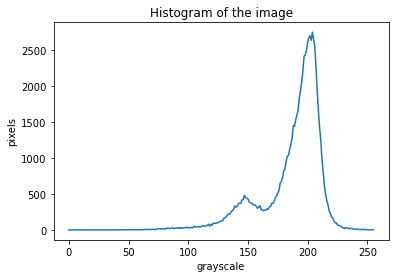

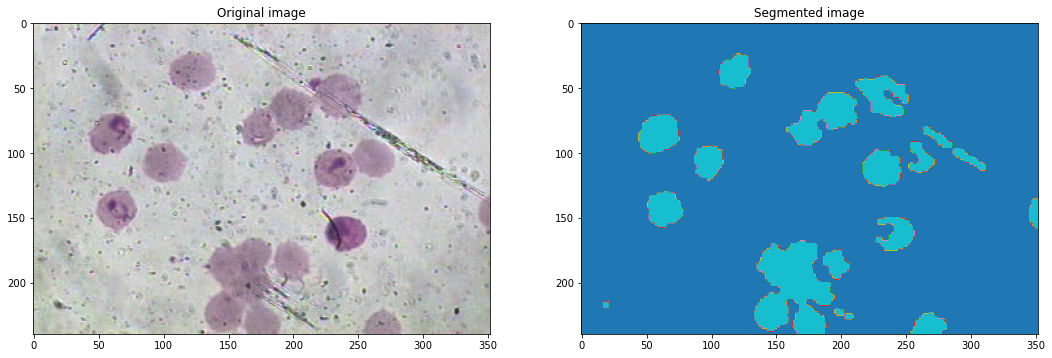

In [54]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','bbox','convex_area','bbox_area','major_axis_length', 'minor_axis_length','eccentricity']
features('malaria.jpeg',90, 150, element, closing, opening)

,area,convex_area,bbox_area,extent,solidity,eccentricity,orientation
0,4,437883,2158210,0.000002,0.000009,0.976925,-0.738038
1,4,459402,999044,0.000004,0.000009,0.856963,-0.093906
2,36,1296776,1675790,0.000021,0.000028,0.871858,0.356071
3,50,1413762,1804544,0.000028,0.000035,0.725682,0.330499
4,128,1650902,1916340,0.000067,0.000078,0.804556,0.515123
...,...,...,...,...,...,...,...
183,2247,2290173,2416581,0.000930,0.000981,0.814314,-0.677486
184,2587,2286505,2411956,0.001073,0.001131,0.824785,-0.692983
185,2640,2281594,2407260,0.001097,0.001157,0.790091,-0.719609
186,1751,2146703,2334423,0.000750,0.000816,0.752226,-0.702022


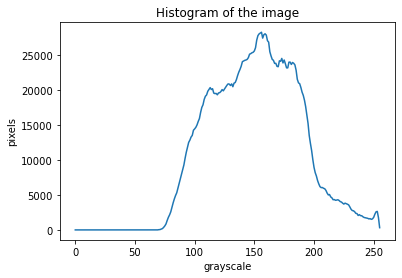

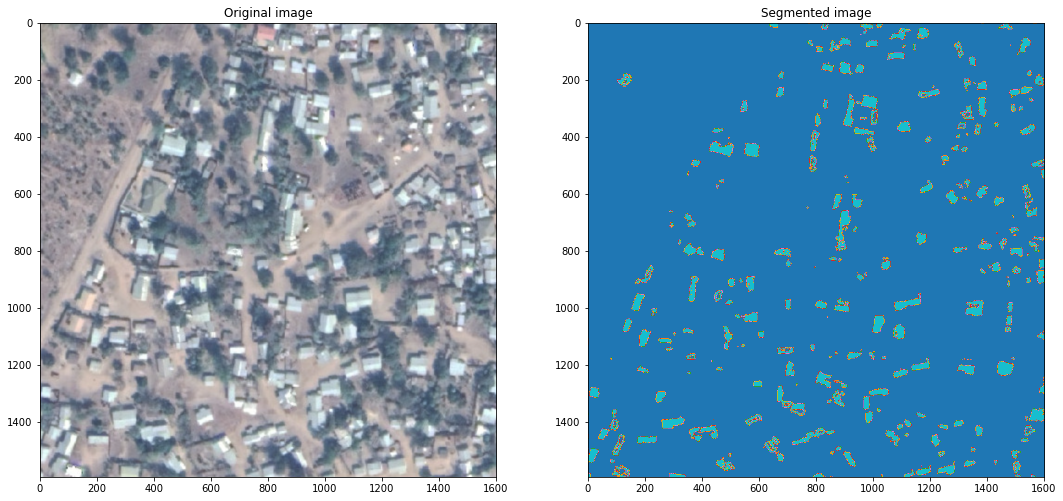

In [58]:
element = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])
properties = ['area','convex_area','bbox_area', 'extent', 'solidity', 'eccentricity', 'orientation']
features('houses.png', 210, 250, element, closing, dilation)

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
0,74,53,0,1044,1283,814462,1271453,1793.480058,1003.027201,0.828990
1,120,39,0,1044,1327,971411,1333635,1719.335749,1248.744123,0.687384
2,108,38,0,1045,1283,857219,1291981,1727.678784,1289.976410,0.665214
3,170,36,0,1217,1598,1169696,1887238,1913.268227,1316.262164,0.725744
4,164,0,0,1215,1601,1256700,1945215,1952.416620,1483.056032,0.650390
...,...,...,...,...,...,...,...,...,...,...
250,3989,30,0,1225,1877,2058726,2243015,2475.861763,1204.092921,0.873774
251,4886,30,0,1226,1877,2052388,2244892,2512.958248,1189.624250,0.880850
252,6734,30,0,1225,1877,2052727,2243015,2519.969808,1233.361469,0.872040
253,12874,41,0,1224,1877,2038604,2220491,2547.666017,1258.738753,0.869419


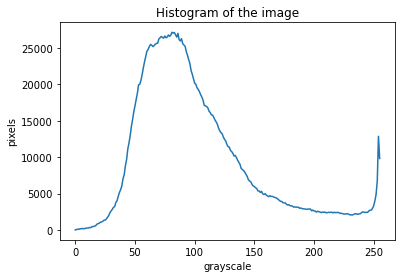

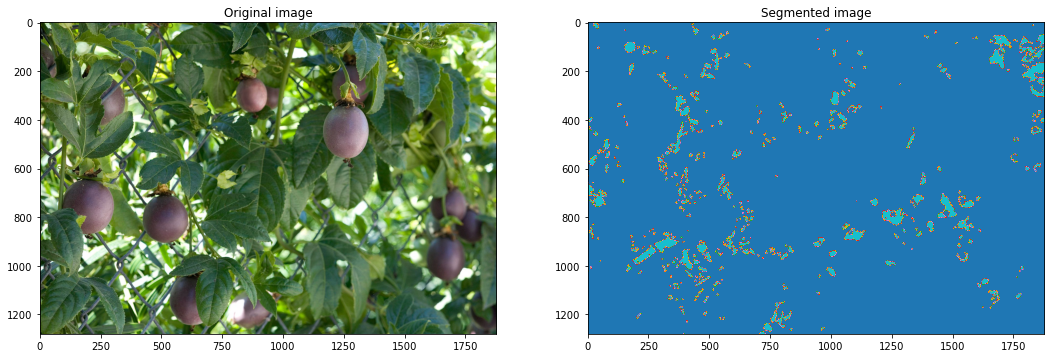

In [61]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','bbox','convex_area','bbox_area','major_axis_length', 'minor_axis_length','eccentricity']
features('fruit.jpg',200, 250, element, closing, opening)

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
0,2,352,407,353,409,2,2,2.000000,0.000000,1.000000
1,3,340,407,354,421,22,196,32.854290,1.218399,0.999312
2,3,344,406,354,421,26,150,29.935388,1.851508,0.998085
3,12,342,404,355,429,148,325,28.784182,9.558230,0.943256
4,11,344,404,448,620,2054,22464,267.582615,16.014669,0.998207
...,...,...,...,...,...,...,...,...,...,...
238,376,79,123,544,878,335711,351075,892.726092,592.426242,0.748074
239,496,79,123,545,874,336005,349966,916.412183,585.512769,0.769274
240,882,79,123,546,875,337443,351184,916.872901,584.907021,0.770089
241,2324,79,123,547,880,340107,354276,899.284429,569.222067,0.774175


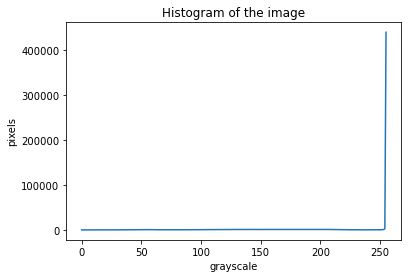

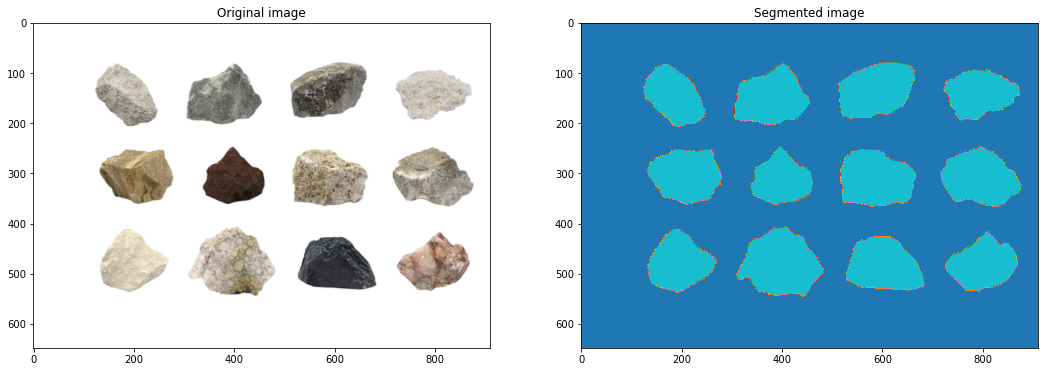

In [84]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','bbox','convex_area','bbox_area','major_axis_length', 'minor_axis_length','eccentricity']
features('rocks.png',0, 240, element, closing, opening)

In [ ]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
properties = ['area','bbox','convex_area','bbox_area','major_axis_length', 'minor_axis_length','eccentricity']
features('shells.jpeg',0, 240, element, closing, opening)

In [62]:
# Creating the function
def morpho(image_name, lower_threshold, upper_threshold, element, operation1, operation2):
    # Loading the grayscale image
    I = Image.open(image_name)
    I_gray = I.convert('L')

    # Calculating the histogram
    count, cells = I_gray.histogram(), list(range(256)) 
    plt.plot(cells, count)
    plt.title('Histogram of the image')
    plt.xlabel('grayscale')
    plt.ylabel('pixels')    

    # Specifying the range values for the threshold
    threshold_range = (lower_threshold, upper_threshold)

    # Thresholding the image within the range
    BW = np.logical_and(np.array(I_gray) > threshold_range[0], np.array(I_gray) < threshold_range[1])

    # Displaying the grayscale and thresholded images
    fig, axs = plt.subplots(1, 2, figsize=(18, 12))
    axs[0].imshow(I_gray, cmap='gray')
    axs[0].set_title('Grayscale image')
    axs[1].imshow(BW, cmap='gray')
    axs[1].set_title('Thresholded image')


    fig, axs = plt.subplots(1, 2, figsize=(18, 12))
    axs[0].imshow(I)
    axs[0].set_title('Original image')
    axs[1].imshow(operation2(operation1(BW, element), element), cmap='gray')
    axs[1].set_title('Segmented image')

In [94]:
import pandas as pd
import numpy as np
from skimage.measure import regionprops_table
from PIL import Image
import matplotlib.pyplot as plt

def morpho(image_name, lower_threshold1, upper_threshold1, lower_threshold2, upper_threshold2, element, operation1, operation2):
    # Loading the grayscale image
    I = Image.open(image_name)
    I_gray = I.convert('L')

    # Calculating the histogram
    count, cells = I_gray.histogram(), list(range(256)) 
    plt.plot(cells, count)
    plt.title('Histogram of the image')
    plt.xlabel('grayscale')
    plt.ylabel('pixels')    

    # Specifying the range values for the thresholds
    threshold_range1 = (lower_threshold1, upper_threshold1)
    threshold_range2 = (lower_threshold2, upper_threshold2)

    # Thresholding the image within the ranges
    BW1 = np.logical_and(np.array(I_gray) > threshold_range1[0], np.array(I_gray) < threshold_range1[1])
    BW2 = np.logical_and(np.array(I_gray) > threshold_range2[0], np.array(I_gray) < threshold_range2[1])

    # Combining the binary images using logical OR
    BW = np.logical_or(BW1, BW2)

    # Displaying the grayscale and thresholded images
    fig, axs = plt.subplots(1, 3, figsize=(18, 12))
    axs[0].imshow(I_gray, cmap='gray')
    axs[0].set_title('Grayscale image')
    axs[1].imshow(BW1, cmap='gray')
    axs[1].set_title('Thresholded image (Range 1)')
    axs[2].imshow(BW2, cmap='gray')
    axs[2].set_title('Thresholded image (Range 2)')

    fig, axs = plt.subplots(1, 2, figsize=(18, 12))
    axs[0].imshow(I)
    axs[0].set_title('Original image')
    axs[1].imshow(operation2(operation1(BW, element), element), cmap='gray')
    axs[1].set_title('Segmented image')
    
    plt.show()

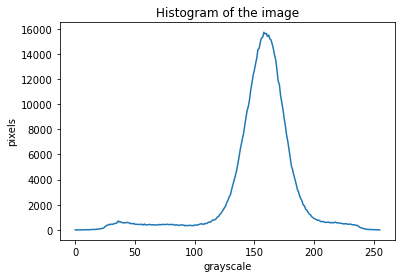

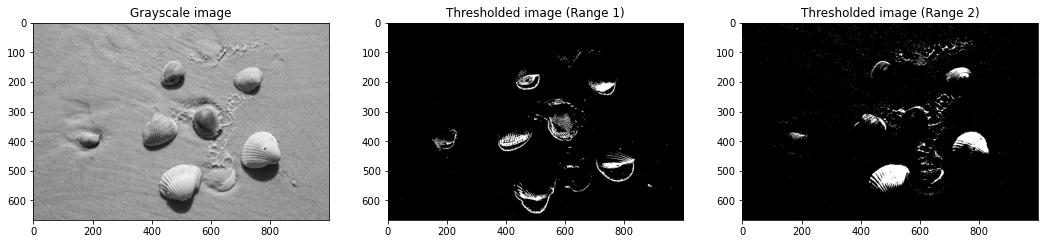

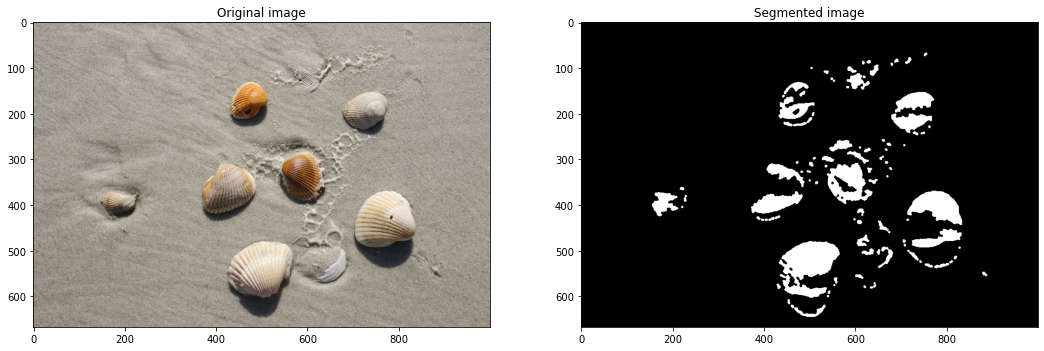

In [98]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])
morpho('shells.jpeg', 50,90, 200, 250, element, closing, opening)